## GEKKO Python Example Applications

![GEKKO Optimization Suite](http://apmonitor.com/wiki/uploads/Main/gekko_optimization.png)

GEKKO is optimization software for mixed-integer and differential algebraic equations. It is coupled with large-scale solvers for linear, quadratic, nonlinear, and mixed integer programming (LP, QP, NLP, MILP, MINLP). Modes of operation include data reconciliation, real-time optimization, dynamic simulation, and nonlinear predictive control. See the [GEKKO documentation](http://gekko.readthedocs.io/en/latest/overview.html) for additional information.

1. Solver Selection
2. Solve Linear Equations
3. Solve Nonlinear Equations
4. Interpolation with Cubic Spline
5. Linear and Polynomial Regression
6. Nonlinear Regression
7. Machine Learning / Artificial Neural Network
8. Solve Differential Equation(s)
9. Nonlinear Programming Optimization
10. Mixed Integer Nonlinear Programming
11. Optimal Control with Integral Objective
12. Optimal Control with Economic Objective
13. Optimal Control: Minimize Final Time
14. PID Control Tuning
15. Process Simulator
16. Moving Horizon Estimation
17. Model Predictive Control
18. Debugging Resources

In [1]:
try:
    # import gekko if installed
    from gekko import GEKKO
except:
    # install gekko if error on try
    !pip install gekko
    from gekko import GEKKO

# package information
!pip show gekko

# upgrade GEKKO to latest version
# !pip install --upgrade gekko

Name: gekko
Version: 0.0.4rc3
Summary: Optimization software for differential algebraic equations
Home-page: https://github.com/BYU-PRISM/GEKKO
Author: BYU PRISM Lab
Author-email: john_hedengren@byu.edu
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, flask
Required-by: 


## 1: Solver selection

Solve $y^2=1$ with APOPT solver. See [APMonitor documentation](https://apmonitor.com/wiki/index.php/Main/OptionApmSolver) or [GEKKO documentation](http://gekko.readthedocs.io/en/latest/global.html?highlight=solver#solver) for additional solver options.

In [2]:
m = GEKKO()           # create GEKKO model
y = m.Var(value=2)    # define new variable, initial value=2
m.Equation(y**2==1)   # define new equation
m.options.SOLVER=1    # change solver (1=APOPT,3=IPOPT)
m.solve(disp=False)   # solve locally (remote=False)
print('y: ' + str(y.value)) # print variable value

y: [1.0]


## 2: Solve Linear Equations

$3\,x + 2\,y=1$

$x+2\,y=0$

In [3]:
m = GEKKO()            # create GEKKO model
x = m.Var()            # define new variable, default=0
y = m.Var()            # define new variable, default=0
m.Equations([3*x+2*y==1, x+2*y==0])  # equations
m.solve(disp=False)    # solve
print(x.value,y.value) # print solution

[0.5] [-0.25]


## 3: Solve Nonlinear Equations

$x+2\,y=0$

$x^2+y^2=1$

In [4]:
m = GEKKO()             # create GEKKO model
x = m.Var(value=0)      # define new variable, initial value=0
y = m.Var(value=1)      # define new variable, initial value=1
m.Equations([x + 2*y==0, x**2+y**2==1]) # equations
m.solve(disp=False)     # solve
print([x.value[0],y.value[0]]) # print solution

[-0.8944272, 0.4472136]


## 4: Interpolation with Cubic Spline


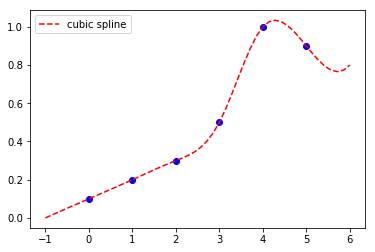

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

m = GEKKO()             # create GEKKO model
m.options.IMODE = 2     # solution mode
x = m.Param(value=np.linspace(-1,6)) # prediction points
y = m.Var()             # prediction results
m.cspline(x, y, xm, ym) # cubic spline
m.solve(disp=False)     # solve

# create plot
plt.plot(xm,ym,'bo')
plt.plot(x.value,y.value,'r--',label='cubic spline')
plt.legend(loc='best')

## 5: Linear and Polynomial Regression

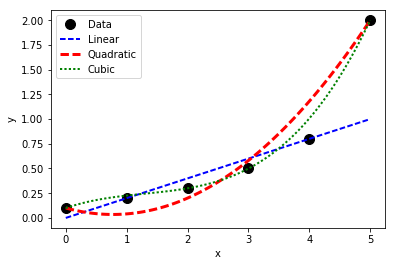

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

#### Solution
m = GEKKO()
m.options.IMODE=2
# coefficients
c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
# polynomial model
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

# linear regression
c[0].STATUS=1
c[1].STATUS=1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]

# quadratic
c[2].STATUS=1
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]

# cubic
c[3].STATUS=1
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]

# plot fit
plt.plot(xm,ym,'ko',markersize=10)
xp = np.linspace(0,5,100)
plt.plot(xp,np.polyval(p1,xp),'b--',linewidth=2)
plt.plot(xp,np.polyval(p2,xp),'r--',linewidth=3)
plt.plot(xp,np.polyval(p3,xp),'g:',linewidth=2)
plt.legend(['Data','Linear','Quadratic','Cubic'],loc='best')
plt.xlabel('x')
plt.ylabel('y')

## 6: Nonlinear Regression

Optimized, a = 0.5990964


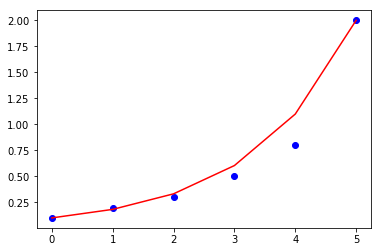

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# measurements
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

# GEKKO model
m = GEKKO()

# parameters
x = m.Param(value=xm)
a = m.FV()
a.STATUS=1

# variables
y = m.CV(value=ym)
y.FSTATUS=1

# regression equation
m.Equation(y==0.1*m.exp(a*x))

# regression mode
m.options.IMODE = 2

# optimize
m.solve(disp=False)

# print parameters
print('Optimized, a = ' + str(a.value[0]))

plt.plot(xm,ym,'bo')
plt.plot(xm,y.value,'r-')

## 7: Machine Learning

Approximate $y = sin(x)$ with an Artificial Neural Network

__Trigonometric Function (trig=True)__

* Input: $x$
* Layer 1: linear layer, 1 node, $l1 = w1 \; x$
* Layer 2: nonlinear layer, 1 node, cosine function, $l2 = \cos(w2a+w2b\;l1)$
* Layer 3: linear layer, 1 node, $l3 = w3 \; l2$
* Output: $y = \sum{l3}$

__Artificial Neural Network Description (trig=False)__

* Input: $x$
* Layer 1: linear layer, 2 nodes, $l1 = w1 \; x$
* Layer 2: nonlinear layer, 2 nodes, hyperbolic tangent activation function, $l2 = \tanh(w2a+w2b\;l1)$
* Layer 3: linear layer, 2 nodes, $l3 = w3 \; l2$
* Output: $y = \sum{l3}$

See [Online Neural Network Demo](https://playground.tensorflow.org) with TensorFlow.

w1[0]: 0.821782978
w1[1]: 0.728869969
w2a[0]: -1.41731735
w2b[0]: 0.548984509
w2a[1]: -0.131957576
w2b[1]: 0.592683118
w2a[2]: -0.330742133
w2b[2]: 0.144440713
w2a[3]: -2.92831117
w2b[3]: 0.66823565
w3[0]: -1.5171649
w3[1]: -1.5171649
w3[2]: 1.62870093
w3[3]: 1.62870093


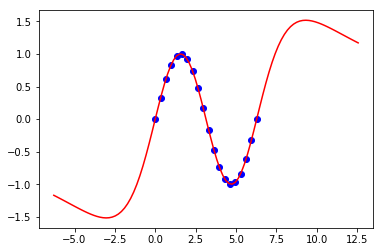

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gekko import GEKKO

# generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)

# option for fitting function
select = False # True / False
if select:
    # Size with cosine function
    nin = 1  # inputs
    n1 = 1   # hidden layer 1 (linear)
    n2 = 1   # hidden layer 2 (nonlinear)
    n3 = 1   # hidden layer 3 (linear)
    nout = 1 # outputs
else:
    # Size with hyperbolic tangent function
    nin = 1  # inputs
    n1 = 2   # hidden layer 1 (linear)
    n2 = 2   # hidden layer 2 (nonlinear)
    n3 = 2   # hidden layer 3 (linear)
    nout = 1 # outputs

# Initialize gekko
train = GEKKO() 
test = GEKKO()

model = [train,test]

for m in model:
    # input(s)
    m.inpt = m.Param()

    # layer 1
    m.w1 = m.Array(m.FV, (nin,n1))
    m.l1 = [m.Intermediate(m.w1[0,i]*m.inpt) for i in range(n1)]

    # layer 2
    m.w2a = m.Array(m.FV, (n1,n2))
    m.w2b = m.Array(m.FV, (n1,n2))
    if select:
        m.l2 = [m.Intermediate(sum([m.cos(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) \
                                for j in range(n1)])) for i in range(n2)]
    else:
        m.l2 = [m.Intermediate(sum([m.tanh(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) \
                                for j in range(n1)])) for i in range(n2)]
        
    # layer 3
    m.w3 = m.Array(m.FV, (n2,n3))
    m.l3 = [m.Intermediate(sum([m.w3[j,i]*m.l2[j] \
            for j in range(n2)])) for i in range(n3)]

    # output(s)
    m.outpt = m.CV()
    m.Equation(m.outpt==sum([m.l3[i] for i in range(n3)]))

    # flatten matrices
    m.w1 = m.w1.flatten()
    m.w2a = m.w2a.flatten()
    m.w2b = m.w2b.flatten()
    m.w3 = m.w3.flatten()
    
# Fit parameter weights
m = train
m.inpt.value=x
m.outpt.value=y
m.outpt.FSTATUS = 1
for i in range(len(m.w1)):
    m.w1[i].FSTATUS=1
    m.w1[i].STATUS=1
    m.w1[i].MEAS=1.0
for i in range(len(m.w2a)):
    m.w2a[i].STATUS=1
    m.w2b[i].STATUS=1
    m.w2a[i].FSTATUS=1
    m.w2b[i].FSTATUS=1
    m.w2a[i].MEAS=1.0
    m.w2b[i].MEAS=0.5
for i in range(len(m.w3)):
    m.w3[i].FSTATUS=1
    m.w3[i].STATUS=1
    m.w3[i].MEAS=1.0
m.options.IMODE = 2
m.options.SOLVER = 3
m.options.EV_TYPE = 2
m.solve(disp=False)

# Test sample points
m = test
for i in range(len(m.w1)):
    m.w1[i].MEAS=train.w1[i].NEWVAL
    m.w1[i].FSTATUS = 1
    print('w1['+str(i)+']: '+str(m.w1[i].MEAS))
for i in range(len(m.w2a)):
    m.w2a[i].MEAS=train.w2a[i].NEWVAL
    m.w2b[i].MEAS=train.w2b[i].NEWVAL
    m.w2a[i].FSTATUS = 1
    m.w2b[i].FSTATUS = 1
    print('w2a['+str(i)+']: '+str(m.w2a[i].MEAS))
    print('w2b['+str(i)+']: '+str(m.w2b[i].MEAS))
for i in range(len(m.w3)):
    m.w3[i].MEAS=train.w3[i].NEWVAL
    m.w3[i].FSTATUS = 1
    print('w3['+str(i)+']: '+str(m.w3[i].MEAS))
m.inpt.value=np.linspace(-2*np.pi,4*np.pi,100)
m.options.IMODE = 2
m.options.SOLVER = 3
m.solve(disp=False)

plt.figure()
plt.plot(x,y,'bo')
plt.plot(test.inpt.value,test.outpt.value,'r-')

## 8: Solve Differential Equation(s)

Solve the following differential equation with initial condition $y(0) = 5$:

$ k \, \frac{dy}{dt} = -t \, y$

where $k=10$. The solution of $y(t)$ should be reported from an initial time $0$ to final time $20$. Create of plot of the result for $y(t)$ versus $t$. 

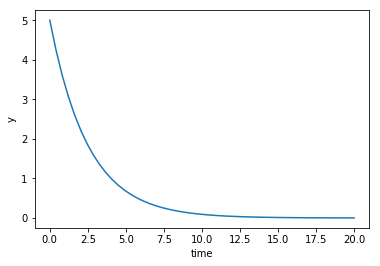

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO() # Initialize gekko
a = 0.4
m.time=np.linspace(0,20)
y = m.Var(value=5.0)
m.Equation(y.dt()==-a*y)
m.options.IMODE=4
m.options.NODES=3
m.solve(disp=False)

plt.plot(m.time,y.value)
plt.xlabel('time')
plt.ylabel('y')

## 9: Nonlinear Programming Optimization

Solve the following nonlinear optimization problem:

$\min x_1 x_4 \left(x_1 + x_2 + x_3\right) + x_3$

$\mathrm{s.t.} \quad x_1 x_2 x_3 x_4 \ge 25$

$x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$

$1\le x_1, x_2, x_3, x_4 \le 5$

with initial conditions:

$x_0 = (1,5,5,1)$


In [10]:
m = GEKKO() # Initialize gekko
# Use IPOPT solver (default)
m.options.SOLVER = 3
# Change to parallel linear solver
m.solver_options = ['linear_solver ma97']
# Initialize variables
x1 = m.Var(value=1,lb=1,ub=5)
x2 = m.Var(value=5,lb=1,ub=5)
x3 = m.Var(value=5,lb=1,ub=5)
x4 = m.Var(value=1,lb=1,ub=5)
# Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Obj(x1*x4*(x1+x2+x3)+x3) # Objective
m.options.IMODE = 3 # Steady state optimization
m.solve(disp=False) # Solve
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m.options.objfcnval))

Results
x1: [1.0]
x2: [4.743]
x3: [3.82115]
x4: [1.379408]
Objective: 17.0140171


## 10: Mixed Integer Nonlinear Programming

In [11]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
                    # minlp iterations with integer solution
                    'minlp_max_iter_with_int_sol 10', \
                    # treat minlp as nlp
                    'minlp_as_nlp 0', \
                    # nlp sub-problem max iterations
                    'nlp_maximum_iterations 50', \
                    # 1 = depth first, 2 = breadth first
                    'minlp_branch_method 1', \
                    # maximum deviation from whole number
                    'minlp_integer_tol 0.05', \
                    # covergence tolerance
                    'minlp_gap_tol 0.01']

# Initialize variables
x1 = m.Var(value=1,lb=1,ub=5)
x2 = m.Var(value=5,lb=1,ub=5)
# Integer constraints for x3 and x4
x3 = m.Var(value=5,lb=1,ub=5,integer=True)
x4 = m.Var(value=1,lb=1,ub=5,integer=True)
# Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Obj(x1*x4*(x1+x2+x3)+x3) # Objective
m.solve(disp=False) # Solve
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m.options.objfcnval))

Results
x1: [1.358909]
x2: [4.599279]
x3: [4.0]
x4: [1.0]
Objective: 17.5322673


## 11: Optimal Control with Integral Objective

__Original Form__

$\min_u \frac{1}{2} \int_0^2 x_1^2(t) \, dt$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$x_1(0) = 1$

$-1 \le u(t) \le 1$

__Equivalent Form for GEKKO with new Variable $x_2$__

$\min_u x_2\left(t_f\right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$\frac{dx_2}{dt} = \frac{1}{2} x_1^2(t)$

$x_1(0) = 1$

$x_2(0) = 0$

$t_f = 2$

$-1 \le u(t) \le 1$

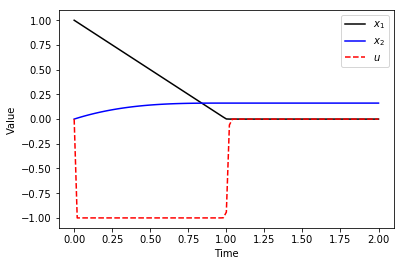

In [12]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO() # initialize gekko
nt = 101
m.time = np.linspace(0,2,nt)
# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0,lb=-1,ub=1)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)
# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==0.5*x1**2)
m.Obj(x2*final) # Objective function
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False) # solve
plt.figure(1) # plot results
plt.plot(m.time,x1.value,'k-',label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',label=r'$x_2$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

## 12: Optimal Control with Economic Objective

__Original Form__

$\max_{u(t)} \int_0^{10} \left(E-\frac{c}{x}\right) u \, U_{max} \, dt$

$\mathrm{subject \; to}$

$\frac{dx}{dt}=r \, x(t) \left(1-\frac{x(t)}{k}\right)-u \, U_{max}$

$x(0) = 70$

$0 \le u(t) \le 1$

$E=1, \, c=17.5, \, r=0.71$

$k=80.5, \, U_{max}=20$

__Equivalent Form for GEKKO__

$\min_{u(t)} -J\left(t_f\right)$

$\mathrm{subject \; to}$

$\frac{dx}{dt}=r \, x(t) \left(1-\frac{x(t)}{k}\right)-u \, U_{max}$

$\frac{dJ}{dt} = \left(E-\frac{c}{x}\right) u \, U_{max}$

$x(0) = 70$

$J(0) = 0$

$0 \le u(t) \le 1$

$t_f = 10, \, E=1, \, c=17.5$

$r=0.71, \, k=80.5, \, U_{max}=20$

Optimal Profit: 106.9061


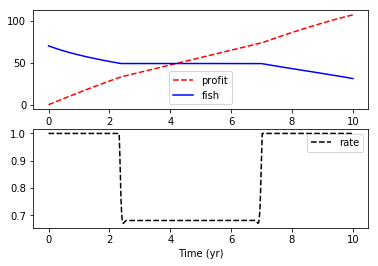

In [13]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create GEKKO model
m = GEKKO()
# time points
n=501
m.time = np.linspace(0,10,n)
# constants
E,c,r,k,U_max = 1,17.5,0.71,80.5,20
# fishing rate
u = m.MV(value=1,lb=0,ub=1)
u.STATUS = 1
u.DCOST = 0
x = m.Var(value=70) # fish population
# fish population balance
m.Equation(x.dt() == r*x*(1-x/k)-u*U_max)
J = m.Var(value=0) # objective (profit)
Jf = m.FV() # final objective
Jf.STATUS = 1
m.Connection(Jf,J,pos2='end')
m.Equation(J.dt() == (E-c/x)*u*U_max)
m.Obj(-Jf) # maximize profit
m.options.IMODE = 6  # optimal control
m.options.NODES = 3  # collocation nodes
m.options.SOLVER = 3 # solver (IPOPT)
m.solve(disp=False) # Solve
print('Optimal Profit: ' + str(Jf.value[0]))
plt.figure(1) # plot results
plt.subplot(2,1,1)
plt.plot(m.time,J.value,'r--',label='profit')
plt.plot(m.time,x.value,'b-',label='fish')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k--',label='rate')
plt.xlabel('Time (yr)')
plt.legend()

## 13: Optimal Control: Minimize Final Time

__Original Form__

$\min_{u(t)} \; t_f$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$\frac{dx_2}{dt}=\cos\left(x_1(t)\right)$

$\frac{dx_3}{dt}=\sin\left(x_1(t)\right)$

$x(0) = \left[\pi/2,4,0\right]$

$x_2\left(t_f\right)=0$

$x_3\left(t_f\right)=0$

$-2 \le u(t) \le 2$

__Equivalent Form for GEKKO__

$\min_{u(t), t_f} \; t_f$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=t_f \, u$

$\frac{dx_2}{dt}=t_f \, \cos\left(x_1(t)\right)$

$\frac{dx_3}{dt}=t_f \, \sin\left(x_1(t)\right)$

$x(0) = \left[\pi/2,4,0\right]$

$x_2\left(t_f\right)=0$

$x_3\left(t_f\right)=0$

$-2 \le u(t) \le 2$

Final Time: 4.316256


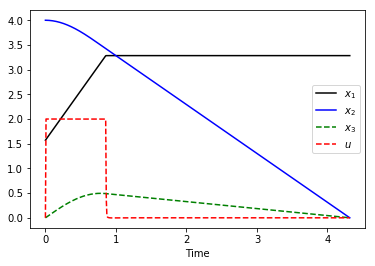

In [14]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO() # initialize GEKKO
nt = 501
m.time = np.linspace(0,1,nt)
# Variables
x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)
p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1
m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)
m.Equation(x2*final<=0)
m.Equation(x3*final<=0)
m.Obj(tf)
m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x1.value,'k-',label=r'$x_1$')
plt.plot(tm,x2.value,'b-',label=r'$x_2$')
plt.plot(tm,x3.value,'g--',label=r'$x_3$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')

## 14: PID Control Tuning

A [PID Controller](https://en.wikipedia.org/wiki/PID_controller) has proportional, integral, and derivative terms to determine the controller output ($OP$) based on the set point ($SP$) and process variable ($PV$). A standard PID form has constants $K_c$, $\tau_I$, and $\tau_D$.


$err = SP-PV$

$OP = OP_0 + K_c \, err + \frac{K_c}{\tau_I} \int err \, dt - K_c \, \tau_D \frac{d\,PV}{dt}$ 

The effect of the tuning constants is shown with the [PID Tuning Notebook](http://nbviewer.jupyter.org/url/apmonitor.com/pdc/uploads/Main/pid_widget.ipynb). This example is an alternative implementation in GEKKO.

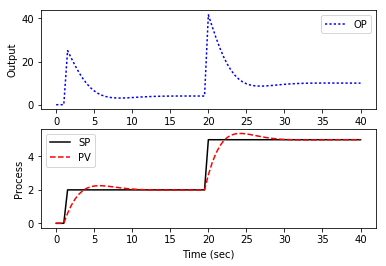

In [15]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO()
tf = 40
m.time = np.linspace(0,tf,2*tf+1)
step = np.zeros(2*tf+1)
step[3:40] = 2.0
step[40:]  = 5.0

# Controller model
Kc = 15.0                    # controller gain
tauI = 2.0                  # controller reset time
tauD = 1.0                  # derivative constant
OP_0 = m.Const(value=0.0)   # OP bias
OP = m.Var(value=0.0)       # controller output
PV = m.Var(value=0.0)       # process variable
SP = m.Param(value=step)    # set point
Intgl = m.Var(value=0.0)    # integral of the error
err = m.Intermediate(SP-PV) # set point error
m.Equation(Intgl.dt()==err) # integral of the error
m.Equation(OP == OP_0 + Kc*err + (Kc/tauI)*Intgl - PV.dt())

# Process model
Kp = 0.5                    # process gain
tauP = 10.0                 # process time constant
m.Equation(tauP*PV.dt() + PV == Kp*OP)

m.options.IMODE=4
m.solve(disp=False)

plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,OP.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,SP.value,'k-',label='SP')
plt.plot(m.time,PV.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()

## 15: Process Simulator

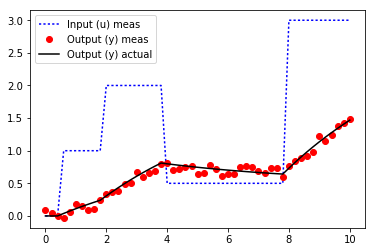

In [16]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

# Generate "data" with process simulation
nt = 51
# input steps
u_meas = np.zeros(nt)
u_meas[3:10] = 1.0
u_meas[10:20] = 2.0
u_meas[20:40] = 0.5
u_meas[40:] = 3.0
# simulation model
p = GEKKO()
p.time = np.linspace(0,10,nt)
n = 1 #process model order
# Parameters
steps = np.zeros(n)
p.u = p.MV(value=u_meas)
p.u.FSTATUS=1
p.K = p.Param(value=1) #gain
p.tau = p.Param(value=5) #time constant
# Intermediate
p.x = [p.Intermediate(p.u)]
# Variables
p.x.extend([p.Var() for _ in range(n)])  #state variables
p.y = p.SV() #measurement
# Equations
p.Equations([p.tau/n * p.x[i+1].dt() == -p.x[i+1] + p.x[i] for i in range(n)])
p.Equation(p.y == p.K * p.x[n])
# Simulate
p.options.IMODE = 4
p.solve(disp=False)
# add measurement noise
y_meas = (np.random.rand(nt)-0.5)*0.2
for i in range(nt):
    y_meas[i] += p.y.value[i]
plt.plot(p.time,u_meas,'b:',label='Input (u) meas')
plt.plot(p.time,y_meas,'ro',label='Output (y) meas')
plt.plot(p.time,p.y.value,'k-',label='Output (y) actual')
plt.legend()

## 16: Moving Horizon Estimation

Run the Process Simulation cell above to generate the data. The MHE application uses a first order model while the process simulation is a second order system. This is done to emulate a realistic case with model mismatch and measurement noise.

This demonstrates just one cycle of an MHE application. Typical MHE applications receive an additional measurements, re-optimize parameters and states, and re-inject the parameters into a controller. 

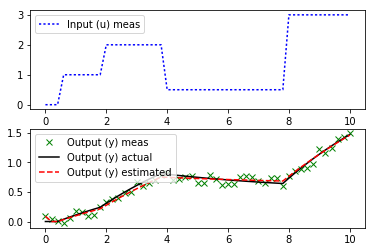

In [17]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

# Estimator Model
m = GEKKO()
m.time = p.time
# Parameters
m.u = m.MV(value=u_meas) #input
m.K = m.FV(value=1, lb=1, ub=3)    # gain
m.tau = m.FV(value=5, lb=1, ub=10) # time constant
# Variables
m.x = m.SV() #state variable
m.y = m.CV(value=y_meas) #measurement
# Equations
m.Equations([m.tau * m.x.dt() == -m.x + m.u, 
             m.y == m.K * m.x])
# Options
m.options.IMODE = 5 #MHE
m.options.EV_TYPE = 1
# STATUS = 0, optimizer doesn't adjust value
# STATUS = 1, optimizer can adjust
m.u.STATUS = 0
m.K.STATUS = 1
m.tau.STATUS = 1
m.y.STATUS = 1
# FSTATUS = 0, no measurement
# FSTATUS = 1, measurement used to update model
m.u.FSTATUS = 1
m.K.FSTATUS = 0
m.tau.FSTATUS = 0
m.y.FSTATUS = 1
# DMAX = maximum movement each cycle
m.K.DMAX = 2.0
m.tau.DMAX = 4.0
# MEAS_GAP = dead-band for measurement / model mismatch
m.y.MEAS_GAP = 0.25

# solve
m.solve(disp=False)

# Plot results
plt.subplot(2,1,1)
plt.plot(m.time,u_meas,'b:',label='Input (u) meas')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,y_meas,'gx',label='Output (y) meas')
plt.plot(p.time,p.y.value,'k-',label='Output (y) actual')
plt.plot(m.time,m.y.value,'r--',label='Output (y) estimated')
plt.legend()

## 17: Model Predictive Control

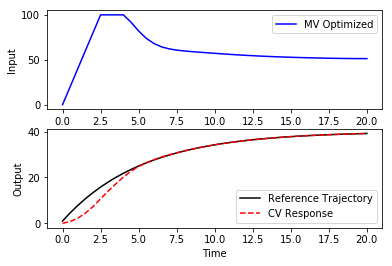

In [18]:
import numpy as np
from random import random
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO()
m.time = np.linspace(0,20,41)

# Parameters
mass = 500
b = m.Param(value=50)
K = m.Param(value=0.8)

# Manipulated variable
p = m.MV(value=0, lb=0, ub=100)
p.STATUS = 1  # allow optimizer to change
p.DCOST = 0.1 # smooth out gas pedal movement
p.DMAX = 20   # slow down change of gas pedal

# Controlled Variable
v = m.CV(value=0)
v.STATUS = 1  # add the SP to the objective
m.options.CV_TYPE = 2 # squared error
v.SP = 40     # set point
v.TR_INIT = 1 # set point trajectory
v.TAU = 5     # time constant of trajectory

# Process model
m.Equation(mass*v.dt() == -v*b + K*b*p)

m.options.IMODE = 6 # control
m.solve(disp=False)

# get additional solution information
import json
with open(m.path+'//results.json') as f:
    results = json.load(f)

plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',label='MV Optimized')
plt.legend()
plt.ylabel('Input')
plt.subplot(2,1,2)
plt.plot(m.time,results['v1.tr'],'k-',label='Reference Trajectory')
plt.plot(m.time,v.value,'r--',label='CV Response')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')

## 18: Debugging Resources

Applications may need a more detailed inspection to find errors in programming syntax, errors in modeling assumptions, or to generate good initial guess values. The GEKKO or the solver solution reports syntax errors. Setting m.solve(disp=True) displays the solver output with a message on the line of code that is unsuccessful. Naming the variables such as name='state' is helpful to display the equations in a readable form.

Other strategies for obtaining a successful solution include:

* Increase the number of iterations with MAX_ITER (0-1000+)
* Increase the diagnostic level with DIAGLEVEL (0-10)
* Change the solver with SOLVER (1-5)
* Calculate model SENSITIVITY (1)
* Solve a square problem with # Variables = # Equations
* Set COLDSTART to initialize problem (0-2)

Additional [modeling](http://apmonitor.com/do/index.php/Main/ModelFormulation), [initialization](http://apmonitor.com/do/index.php/Main/ModelInitialization), and [decomposition](https://www.sciencedirect.com/science/article/pii/S0098135415001179) tips may be helpful. There is also an online [discussion group](http://apmonitor.com/wiki/index.php/Main/UsersGroup), [video playlist](https://www.youtube.com/playlist?list=PLLBUgWXdTBDjcqDl2e5F_hcBjEc6vjr1X), [GEKKO documentation](http://gekko.readthedocs.io/en/latest/), and [APMonitor documentation](http://apmonitor.com/wiki/index.php/Main/HomePage) as additional resources.

In [19]:
from gekko import GEKKO

m = GEKKO()                 # create GEKKO model

print('--------- Follow local path to view files --------------')
print(m.path)               # show source file path
print('--------------------------------------------------------')

# test application
u = m.FV(value=5,name='u')  # define fixed value
x = m.SV(name='state')      # define state variable
m.Equation(x==u)            # define equation
m.options.COLDSTART = 1     # coldstart option
m.options.DIAGLEVEL = 0     # diagnostic level (0-10)
m.options.MAX_ITER = 500    # adjust maximum iterations
m.options.SENSITIVITY = 1   # sensitivity analysis
m.options.SOLVER = 1        # change solver (1=APOPT,3=IPOPT)
m.solve(disp=True)          # solve locally (remote=False)
print('x: ' + str(x.value)) # print variable value

--------- Follow local path to view files --------------
C:\Users\johnh\AppData\Local\Temp\tmp7c4y0_fmgk_model18
--------------------------------------------------------
apm 10.5.113.123_gk_model18 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              1
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ---------